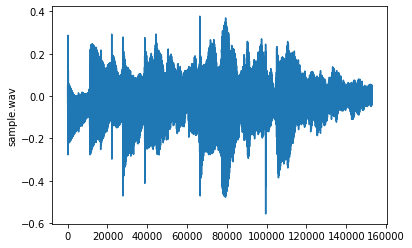

In [10]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'sample.wav'
data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()



In [11]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
desired_sample_rate = 11000.0
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[-0.00033314  0.00071756 -0.00442745 ...  0.03035855  0.01959196
  0.005611  ]
length 38151
max value 0.37594417
min value -0.54825115
value range 0.9241953


In [12]:
m68code = "/*    File "+soundfile+ "\r\n *    Sample rate "+str(int(desired_sample_rate)) +" Hz\r\n */\r\n"
m68code += "#define WAV_DATA_LENGTH "+str(len(data_out))+" \r\n\r\n"
m68code += "uint8_t WAV_DATA[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    v =  int((isin * 255))
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)    

/*    File sample.wav
 *    Sample rate 11000 Hz
 */
#define WAV_DATA_LENGTH 38151 

uint8_t WAV_DATA[] = {
    151,151,150,144,152,164,162,146,141,155,157,137,113,118,150,182,
    193,184,164,149,148,153,159,159,152,142,133,128,129,135,141,138,
    128,114,103,100,106,119,138,163,189,211,225,230,224,208,187,162,
    136,113,93,80,74,78,89,106,126,147,166,182,192,195,193,184,
    170,152,133,114,98,87,82,83,90,100,114,130,146,160,172,180,
    184,183,178,169,159,148,137,127,118,112,109,109,111,116,124,133,
    142,151,158,164,167,167,164,158,149,138,126,115,104,96,91,90,
    92,98,106,116,127,139,149,157,163,166,166,163,158,152,145,138,
    131,125,121,119,119,121,124,130,136,144,151,157,162,166,166,165,
    160,153,144,133,122,111,101,94,90,90,93,99,108,118,129,140,
    149,157,162,165,165,162,158,152,145,138,132,126,122,121,120,122,
    126,131,137,144,150,156,161,164,164,162,157,150,141,131,120,110,
    101,94,91,91,94,101,109,119,130,140,150,157,162,165,164,162,
    157,151,144,138